In [3]:
import os
import csv
import json
import pickle as pkl

# wdir = '../results/hpsearch-2021-09-06/best/1_run_168/evalmockAllStates/step_0/'
# wdir = '../results/stdp-es-model/evalmockAllStates/step_0/'
wdir = '../results/seedrun_m1-2022-01-16/run_seed1394398/continue_1/continue_1/continue_2/continue_2/continue_2/evalmockAllStates/step_0/'

with open(os.path.join(wdir, 'sim.pkl'), 'rb') as f:
    sim = pkl.load(f)

ts = []
with open(os.path.join(wdir, 'ActionsRewards.txt')) as f:
    for row in csv.reader(f, delimiter='\t'):
        ts.append(float(row[0]))
        
ts.append(ts[-1] + 50)

spkt = sim['simData']['spkt']
spkid = sim['simData']['spkid']

In [91]:
input_pop = list(range(0, 80))
space_between = 49.8 # ms

prev_st = -1
curr_step = -1
activations = []

for st, sid in zip(spkt, spkid):
    if st < space_between * 3:
        continue

    if st > prev_st + space_between:
        curr_step += 1
        activations.append({ 'es': [], 'rest': [], 'min': spkt[-1] + 100, 'max': -1})
    activations[curr_step]['es' if sid in input_pop else 'rest'].append(sid)
    activations[curr_step]['min'] = min(st, activations[curr_step]['min'])
    activations[curr_step]['max'] = max(st, activations[curr_step]['max'])
    
    prev_st = st
    
assert len(activations) == 8000

In [6]:
print('len', len(activations))
print(activations[2012])

len 8000
{'es': [45.0, 60.0, 12.0, 20.0, 45.0, 60.0, 12.0, 20.0, 45.0, 60.0, 12.0, 20.0], 'rest': [91.0, 106.0, 93.0, 115.0, 113.0, 91.0, 106.0, 119.0, 96.0, 98.0, 93.0, 115.0, 107.0, 94.0, 102.0, 113.0, 159.0, 169.0, 157.0, 153.0, 158.0, 150.0, 132.0, 151.0, 161.0, 163.0, 137.0, 152.0, 144.0, 129.0, 160.0, 173.0, 174.0, 149.0, 178.0, 139.0, 131.0, 133.0, 175.0, 167.0, 168.0, 172.0, 141.0, 179.0, 128.0, 124.0, 171.0, 134.0, 138.0, 166.0, 120.0, 170.0, 123.0, 165.0, 130.0, 185.0, 183.0, 192.0, 186.0, 181.0, 189.0, 184.0, 187.0, 182.0, 180.0, 196.0, 188.0, 199.0, 195.0, 191.0, 197.0, 198.0, 190.0, 194.0, 193.0, 93.0, 115.0], 'min': 300743.9834778774, 'max': 300786.2418745454}


In [16]:
diffs = [act['max'] - act['min']  for act in activations]

In [17]:
min(diffs), max(diffs)

(40.0426725151483, 51.98353253561072)

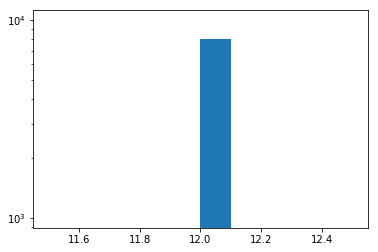

In [14]:
import matplotlib.pyplot as plt

es_acts = [len(act['es']) for act in activations]

plt.hist(es_acts)
plt.yscale('log')
plt.show()

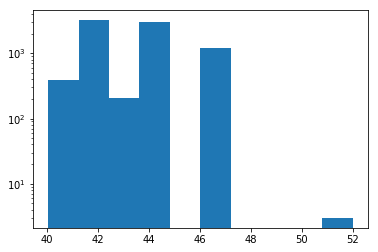

In [19]:
import matplotlib.pyplot as plt

plt.hist(diffs)
plt.yscale('log')
plt.show()

# Test all activations if there are overflowing spikes

In [57]:
import os
import csv
import json
import pickle as pkl
import bisect

# model_dir = '../results/seedrun_m1-2022-01-16/run_seed1394398/continue_1/continue_1/continue_2/continue_2/continue_2/'
model_dir = '../results/seedrun_m1-2022-01-16/run_seed5397326/continue_1/continue_1/continue_2/continue_2/continue_2/'

input_pop = list(range(0, 80))
space_between = 49.8 # ms

total_overflows = 0
    
for step in range(20):
    print(step)
    wdir = os.path.join(model_dir, 'evalmockAllStates/step_{}/'.format(step))

    with open(os.path.join(wdir, 'sim.pkl'), 'rb') as f:
        sim = pkl.load(f)

    ts = []
    with open(os.path.join(wdir, 'ActionsRewards.txt')) as f:
        for row in csv.reader(f, delimiter='\t'):
            ts.append(float(row[0]))
    ts.append(ts[-1] + 50)

    spkt = sim['simData']['spkt']
    spkid = sim['simData']['spkid']
    
    # get the activations
    prev_st = -1
    curr_step = -1
    activations = []
    for st, sid in zip(spkt, spkid):
        if st < space_between * 3:
            continue

        if st > prev_st + space_between:
            curr_step += 1
            activations.append({ 'es': [], 'rest': [], 'min': spkt[-1] + 100, 'max': -1})
        activations[curr_step]['es' if sid in input_pop else 'rest'].append(sid)
        activations[curr_step]['min'] = min(st, activations[curr_step]['min'])
        activations[curr_step]['max'] = max(st, activations[curr_step]['max'])
        prev_st = st

    assert len(activations) == 8000
    
    # Find the extra activations outside the usual stepsize
    for a in activations:
        if a['max'] - a['min'] > 49.8:
            step_min = a['min'] - a['min'] % space_between
            tid = bisect.bisect_left(spkt, step_min)
            extras = []
            while spkt[tid] <= a['max']:
                if spkt[tid] >= step_min + space_between:
                    extras.append(spkid[tid])
                tid += 1
            print(extras)
            total_overflows += len(extras)
            
print('total_overflows', total_overflows)

0
1
[185.0]
[180.0]
[167.0]
2
[180.0, 188.0]
[188.0]
[167.0]
[188.0]
[188.0]
[167.0]
3
[185.0]
[188.0]
4
[180.0]
5
[167.0]
[167.0]
[167.0]
[167.0]
[167.0]
[167.0]
[167.0]
[167.0]
[167.0]
[167.0]
6
[185.0]
7
8
[171.0, 189.0]
[185.0]
[185.0]
[185.0]
[185.0]
9
[185.0]
10
[185.0]
11
[185.0]
12
13
[167.0]
[167.0]
[167.0]
14
15
[185.0]
16
[181.0]
[167.0]
[167.0]
17
18
[167.0]
19
[181.0]
[167.0]
[167.0]
total_overflows 44


## Prepare all activations for all inputs dataset for all seeds (models)

In [4]:
import os
import csv
import json
import pickle as pkl
import bisect

input_pop = list(range(0, 80))
space_between = 49.8 # ms
EM_LEFT = list(range(140, 160))
EM_RIGHT = list(range(160, 180))

def get_activations(wdir):
    with open(os.path.join(wdir, 'sim.pkl'), 'rb') as f:
        sim = pkl.load(f)

    spkt = sim['simData']['spkt']
    spkid = sim['simData']['spkid']
    
    # get the activations
    prev_st = -1
    curr_step = -1
    activations = []
    for st, sid in zip(spkt, spkid):
        if st < space_between * 3:
            continue

        if st > prev_st + space_between:
            curr_step += 1
            activations.append({ 'es': [], 'rest': [], 'min': spkt[-1] + 100, 'max': -1})
        activations[curr_step]['es' if sid in input_pop else 'rest'].append(int(sid))
        activations[curr_step]['min'] = min(st, activations[curr_step]['min'])
        activations[curr_step]['max'] = max(st, activations[curr_step]['max'])
        prev_st = st
        
    assert len(activations) == 8000

    for a in activations:
        if a['max'] - a['min'] > 49.8:
            step_min = a['min'] - a['min'] % space_between
            tid = bisect.bisect_left(spkt, step_min)
            extras = []
            while spkt[tid] <= a['max']:
                if spkt[tid] >= step_min + space_between:
                    extras.append(spkid[tid])
                tid += 1
            a['overflow'] = extras
        else:
            a['overflow'] = []
            
        cnt_left = sum([1 for n in a['rest'] if n in EM_LEFT])
        cnt_right = sum([1 for n in a['rest'] if n in EM_RIGHT])
        a['move'] = 'L' if cnt_left > cnt_right else ('R' if cnt_right > cnt_left else 'U')
        
    return activations
            

In [118]:
from tqdm import tqdm

# model_dir = '../results/seedrun_m1-2022-01-16/run_seed1394398/continue_1/continue_1/continue_2/continue_2/continue_2/'
model_dir = '../results/seedrun_m1-2022-01-16/run_seed5397326/continue_1/continue_1/continue_2/continue_2/continue_2/'
    
all_activations = []
for step in tqdm(range(20)):
    wdir = os.path.join(model_dir, 'evalmockAllStates/step_{}/'.format(step))
    activations = get_activations(wdir)
    all_activations.extend(activations)

print('all_activations', len(all_activations))


100%|██████████| 20/20 [00:57<00:00,  2.87s/it]

all_activations 160000


In [119]:
outdir = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/'

seed = 'run_seed5397326'
with open(os.path.join(outdir, 'activations', 'all_activations_{}.json'.format(seed)), 'w') as out:
    for act in all_activations:
        out.write(json.dumps(act) + '\n')


In [120]:
from tqdm import tqdm

SEEDS = ['run_seed1257804', 'run_seed1932160', 'run_seed2544501', 'run_seed5140568', 'run_seed5381445', 'run_seed6623146', 'run_seed7892276', 'run_seed9300610']
outdir = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/'

for seed in SEEDS:
    print(seed)
    model_dir = outdir + '/evalmockAllStates_{}/'.format(seed)

    all_activations = []
    for step in tqdm(range(20)):
        wdir = os.path.join(model_dir, 'step_{}/'.format(step))
        activations = get_activations(wdir)
        all_activations.extend(activations)

    assert len(all_activations) == 160000
    
    with open(os.path.join(outdir, 'activations', 'all_activations_{}.json'.format(seed)), 'w') as out:
        for act in all_activations:
            out.write(json.dumps(act) + '\n')


run_seed1257804


100%|██████████| 20/20 [00:52<00:00,  2.63s/it]


run_seed1932160


100%|██████████| 20/20 [00:50<00:00,  2.51s/it]


run_seed2544501


100%|██████████| 20/20 [00:54<00:00,  2.70s/it]


run_seed5140568


100%|██████████| 20/20 [00:50<00:00,  2.54s/it]


run_seed5381445


100%|██████████| 20/20 [00:52<00:00,  2.65s/it]


run_seed6623146


100%|██████████| 20/20 [00:55<00:00,  2.77s/it]


run_seed7892276


100%|██████████| 20/20 [00:54<00:00,  2.73s/it]


run_seed9300610


100%|██████████| 20/20 [00:52<00:00,  2.60s/it]


### For EVOL


In [181]:
from tqdm import tqdm

SEEDS = ['run_seed1257804', 'run_seed1394398', 'run_seed1932160', 'run_seed2544501',
         'run_seed5140568', 'run_seed5381445', 'run_seed5397326', 'run_seed6623146',
         'run_seed7892276', 'run_seed9300610']
outdir = '../results/seedrun_evol-2022-02-20/evalmockAllStates_EVOL'

for seed in SEEDS:
    print(seed)
    model_dir = outdir + '/{}/'.format(seed)
    
    if not os.path.isdir(os.path.join(model_dir, 'step_0')):
        model_dir = os.path.join(model_dir, 'continue_1', 'evalmockAllStates')

    all_activations = []
    for step in tqdm(range(20)):
        wdir = os.path.join(model_dir, 'step_{}/'.format(step))
        activations = get_activations(wdir)
        all_activations.extend(activations)

    assert len(all_activations) == 160000

    with open(os.path.join(outdir, 'activations_EVOL', 'all_activations_{}.json'.format(seed)), 'w') as out:
        for act in all_activations:
            out.write(json.dumps(act) + '\n')


run_seed1257804


100%|██████████| 20/20 [00:44<00:00,  2.23s/it]


run_seed1394398


100%|██████████| 20/20 [00:47<00:00,  2.36s/it]


run_seed1932160


100%|██████████| 20/20 [00:42<00:00,  2.11s/it]


run_seed2544501


100%|██████████| 20/20 [00:40<00:00,  2.02s/it]


run_seed5140568


100%|██████████| 20/20 [00:44<00:00,  2.22s/it]


run_seed5381445


100%|██████████| 20/20 [00:39<00:00,  1.99s/it]


run_seed5397326


100%|██████████| 20/20 [00:45<00:00,  2.30s/it]


run_seed6623146


100%|██████████| 20/20 [00:44<00:00,  2.24s/it]


run_seed7892276


100%|██████████| 20/20 [00:46<00:00,  2.31s/it]


run_seed9300610


100%|██████████| 20/20 [00:46<00:00,  2.33s/it]


### For INIT


In [5]:
from tqdm import tqdm

SEEDS = ['run_seed1394398', 'run_seed5397326']
basedir = '../results/seedrun_m1-2022-01-16'
outdir = basedir + '/evalmockAllStates_STDP-RL/activations_INIT'
outdir

for seed in SEEDS:
    print(seed)
    model_dir = '{}/{}/atinit_evalmockAllStates'.format(basedir, seed)

    all_activations = []
    for step in tqdm(range(20)):
        wdir = os.path.join(model_dir, 'step_{}/'.format(step))
        activations = get_activations(wdir)
        all_activations.extend(activations)

    assert len(all_activations) == 160000
    
    with open(os.path.join(outdir, 'all_activations_{}.json'.format(seed)), 'w') as out:
        for act in all_activations:
            out.write(json.dumps(act) + '\n')


run_seed1394398


100%|██████████| 20/20 [00:53<00:00,  2.68s/it]


run_seed5397326


100%|██████████| 20/20 [00:51<00:00,  2.60s/it]


### STDP-RL without Gain normalization

In [27]:
from tqdm import tqdm

seed = 'run_seed1394398'
basedir = '../results/seedrun_n2-plast_check/run_seed1394398/continue_1/continue_1/continue_1/continue_1/continue_1'
outdir = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_noNorm_STDP-RL'

print(seed)
model_dir = '{}/evalmockAllStates'.format(basedir)

all_activations = []
for step in tqdm(range(20)):
    wdir = os.path.join(model_dir, 'step_{}/'.format(step))
    activations = get_activations(wdir)
    all_activations.extend(activations)

assert len(all_activations) == 160000

with open(os.path.join(outdir, 'all_activations_{}.json'.format(seed)), 'w') as out:
    for act in all_activations:
        out.write(json.dumps(act) + '\n')


run_seed1394398


100%|██████████| 20/20 [00:58<00:00,  2.90s/it]


# Analyze the activations results

In [182]:
import os
import json
import numpy as np
from tqdm import tqdm

SEEDS = ['run_seed1257804', 'run_seed1394398', 'run_seed1932160', 'run_seed2544501',
         'run_seed5140568', 'run_seed5397326', 'run_seed5381445', 'run_seed6623146',
         'run_seed7892276', 'run_seed9300610']

acts_dir_STDPRL = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_STDP-RL/'
acts_dir_EVOL = '../results/seedrun_evol-2022-02-20/evalmockAllStates_EVOL/activations_EVOL/'

def extract_all_acts(acts_dir, seeds):
    acts = {}
    for seed in tqdm(SEEDS):
        activations = []
        with open(os.path.join(acts_dir,'all_activations_{}.json'.format(seed))) as f:
            for idx, line in enumerate(f):
                j = json.loads(line)
                ins = np.array(sorted(np.unique(j['es']).tolist()))
                code = sum((ins - np.array([0, 20, 40, 60])) * np.array([1, 20, 400, 8000]))

                assert code == idx, 'code: {}, idx: {}, ins: {}'.format(code, idx, ins)
                activations.append(j['move'])
        acts[seed] = activations
    return acts

actsRL = extract_all_acts(acts_dir_STDPRL, SEEDS)
actsEV = extract_all_acts(acts_dir_EVOL, SEEDS)


100%|██████████| 10/10 [00:54<00:00,  5.49s/it]


In [135]:
import csv

order = []

with open('seed-medians_STDPRL.csv') as f:
    for row in csv.DictReader(f):
        order.append({
            'seed': row['seed'],
            'median': float(row['median on STDP-RL'])})

order = sorted(order, key=lambda x:x['median'])
        
print(order)

[{'seed': 'run_seed5397326', 'median': 53.0}, {'seed': 'run_seed7892276', 'median': 58.0}, {'seed': 'run_seed1932160', 'median': 63.0}, {'seed': 'run_seed6623146', 'median': 69.0}, {'seed': 'run_seed9300610', 'median': 76.0}, {'seed': 'run_seed5381445', 'median': 77.0}, {'seed': 'run_seed2544501', 'median': 78.0}, {'seed': 'run_seed5140568', 'median': 103.0}, {'seed': 'run_seed1257804', 'median': 114.0}, {'seed': 'run_seed1394398', 'median': 130.5}]


In [142]:
from collections import Counter

counts_per_seed = {}
for seed,act_list in acts.items(): 
    counts_per_seed[seed] = Counter(act_list)
    
lefts = [counts_per_seed[s['seed']]['L'] for s in order]
rights = [counts_per_seed[s['seed']]['R'] for s in order]
unks = [counts_per_seed[s['seed']]['U'] for s in order]

In [143]:
lefts

[70318, 73401, 95368, 70186, 78192, 79667, 56525, 78669, 63983, 74386]

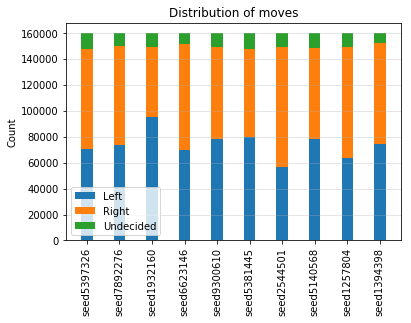

In [152]:


fig, ax = plt.subplots()

labels = [s['seed'].replace('run_', '') for s in order]

width = 0.35
ax.bar(labels, lefts, width, label='Left')
ax.bar(labels, rights, width, bottom=lefts, label='Right')
ax.bar(labels, unks, width, bottom=np.array(lefts) + np.array(rights), label='Undecided')

ax.grid(alpha=0.4, axis='y')
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('Count')
ax.set_title('Distribution of moves')
ax.legend()

plt.show()

In [188]:
np.min(agreement[agreement > 0])
np.max(agreement[agreement > 0])

0.6390875

In [272]:
import seaborn as sns

def compute_agreement(acts, order, inspace=None):
    agreement = np.zeros((len(order),len(order)))
    for i1,s1 in enumerate(order):
        for i2,s2 in enumerate(order):
            if i1 <= i2:
                agreement[i1][i2]= np.nan
                continue
            if inspace == None:
                agreement[i1][i2] = sum([a1 == a2 for a1, a2 in zip(acts[s1], acts[s2])]) / len(acts[s1])
            else:
                steps_same = [a1 == a2
                    for j,(a1, a2) in enumerate(zip(acts[s1], acts[s2]))
                    if j in inspace]
                total_steps = len([j for j,_ in enumerate(acts[s1]) if j in inspace])
                assert total_steps == len(inspace)
                agreement[i1][i2] = sum(steps_same) / total_steps
    return agreement

agreeEV = compute_agreement(actsEV, [s['seed'] for s in order])
agreeRL = compute_agreement(actsRL, [s['seed'] for s in order])


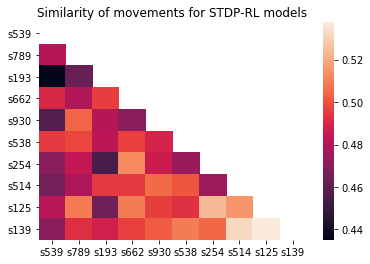

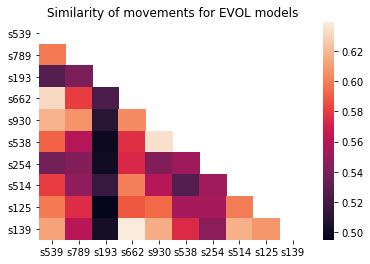

In [198]:

lbls =[s['seed'].replace('run_seed', 's')[:4] for s in order]
ax = sns.heatmap(agreeRL, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for STDP-RL models')
plt.show()

lbls =[s['seed'].replace('run_seed', 's')[:4] for s in order]
ax = sns.heatmap(agreeEV, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for EVOL models')
plt.show()


In [212]:
actsAll = {}
for k,v in actsRL.items():
    actsAll['RL' + k] = v
for k,v in actsEV.items():
    actsAll['EV' + k] = v

orderAll = [t + s['seed'] for t in ['RL', 'EV'] for s in order ]
agreeAll = compute_agreement(actsAll, orderAll)

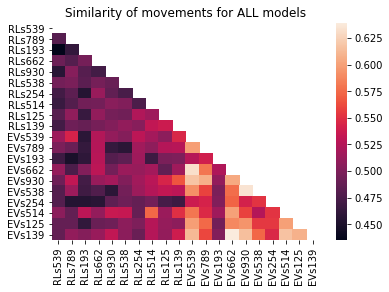

In [214]:

lbls =[s.replace('run_seed', 's')[:6] for s in orderAll]
ax = sns.heatmap(agreeAll, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for ALL models')
plt.show()

## Look at observations

In [236]:
with open('all_observations.json') as f:
    obs_map = json.load(f)

    
all_obs = [o for _,obs in obs_map.items() for o in obs]
obs_freq = Counter(all_obs)

all_unique_obs = sorted(list(np.unique(all_obs)))
uni_obs = {k:True for k in all_unique_obs}

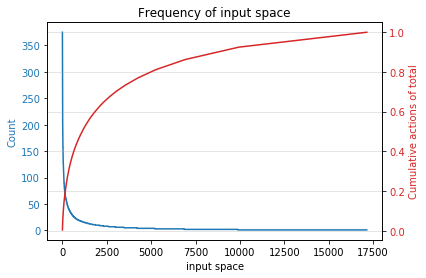

In [250]:
freqs = [v for k,v in sorted(list(obs_freq.items()), key=lambda x:x[1], reverse=True)]
cs_freqs = np.cumsum(freqs) / sum(freqs)


fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(freqs, color=color)
ax1.set_ylabel('Count', color=color)
ax1.set_xlabel('input space')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.plot(cs_freqs, color=color)

ax2.set_ylabel('Cumulative actions of total', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Frequency of input space')
plt.grid(alpha=0.4)

plt.show()

In [273]:

agreeEVinSpace = compute_agreement(actsEV, [s['seed'] for s in order], uni_obs)
agreeRLinSpace = compute_agreement(actsRL, [s['seed'] for s in order], uni_obs)

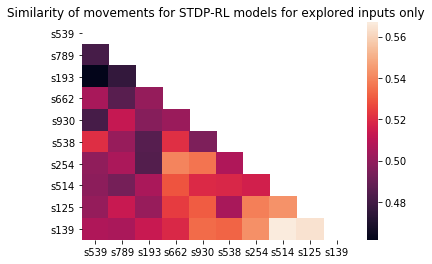

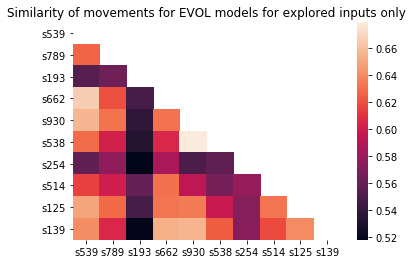

In [274]:

lbls =[s['seed'].replace('run_seed', 's')[:4] for s in order]
ax = sns.heatmap(agreeRLinSpace, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for STDP-RL models for explored inputs only')
plt.show()

lbls =[s['seed'].replace('run_seed', 's')[:4] for s in order]
ax = sns.heatmap(agreeEVinSpace, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for EVOL models for explored inputs only')
plt.show()


In [257]:
cumsteps_explained = 0.5 # number of total steps explained

freqs = [v for k,v in sorted(list(obs_freq.items()), key=lambda x:x[1], reverse=True)]
count_of_inspace = np.where((np.cumsum(freqs) / sum(freqs)) > cumsteps_explained)[0][0]
most_common = [k for k,v in sorted(list(obs_freq.items()), key=lambda x:x[1], reverse=True)[:count_of_inspace]]
uni_obs_mc = {k:True for k in most_common}

In [255]:
len(most_common)

1112

In [275]:

agreeEVinSpaceMC = compute_agreement(actsEV, [s['seed'] for s in order], uni_obs_mc)
agreeRLinSpaceMc = compute_agreement(actsRL, [s['seed'] for s in order], uni_obs_mc)

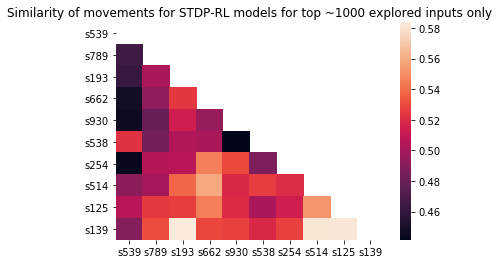

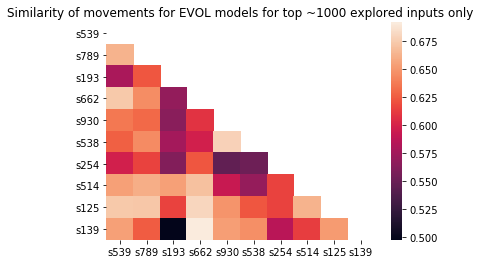

In [277]:

lbls =[s['seed'].replace('run_seed', 's')[:4] for s in order]
ax = sns.heatmap(agreeRLinSpaceMc, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for STDP-RL models for top ~1000 explored inputs only')
plt.show()

lbls =[s['seed'].replace('run_seed', 's')[:4] for s in order]
ax = sns.heatmap(agreeEVinSpaceMC, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for EVOL models for top ~1000 explored inputs only')
plt.show()


In [ ]:
actsAll = {}
for k,v in actsRL.items():
    actsAll['RL' + k] = v
for k,v in actsEV.items():
    actsAll['EV' + k] = v

orderAll = [t + s['seed'] for t in ['RL', 'EV'] for s in order ]
agreeAll = compute_agreement(actsAll, orderAll, )

In [ ]:

lbls =[s.replace('run_seed', 's')[:6] for s in orderAll]
ax = sns.heatmap(agreeAll, xticklabels=lbls, yticklabels=lbls)
ax.set_title('Similarity of movements for ALL models')
plt.show()

## Measuring differences in weights between INIT and STDP-RL

In [24]:
import numpy as np

seed = 'run_seed1394398'
# seed = 'run_seed5397326'

path_init = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_INIT/all_activations_{}.json'.format(seed)
path_stdp = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_STDP-RL/all_activations_{}.json'.format(seed)

def read_acts(p):
    acts = []
    with open(p) as f:
        for line in f:
            acts.append(json.loads(line))
    return acts

init_acts = read_acts(path_init)
stdp_acts = read_acts(path_stdp)

assert len(init_acts) == len(stdp_acts)

def get_ins(a):
    return sorted(list(set(a)))

diffs = []
mi_s = []
mi_i = []

for a_i, a_s in tqdm(zip(init_acts, stdp_acts), desc='processing'):
    in1 = get_ins(a_i['es'])
    in2 = get_ins(a_s['es'])
    assert len(in1) == len(in2) and sum([0 if i1 == i2 else 1 for i1, i2 in zip(in1, in2)]) == 0
    r_i = get_ins(a_i['rest'])
    r_s = get_ins(a_s['rest'])
    r_both = get_ins(a_i['rest'] + a_s['rest'])
    
    diffs.append([])
    mi_s.append([])
    mi_i.append([])
    for r in r_both:
        if r not in r_i or r not in r_s:
            diffs[-1].append(r)
        if r not in r_i:
            mi_i[-1].append(r)
        if r not in r_s:
            mi_s[-1].append(r)
            

cnts = np.zeros(200)
cnts_mi_s = np.zeros(200)
cnts_mi_i = np.zeros(200)

for d1,d2,d3 in tqdm(zip(diffs, mi_s, mi_i), desc='aggregating'):
    for nid in d1:
        cnts[nid] += 1
    for nid in d2:
        cnts_mi_s[nid] += 1
    for nid in d3:
        cnts_mi_i[nid] += 1


processing: 160000it [00:15, 10462.65it/s]
aggregating: 160000it [00:03, 41384.74it/s]


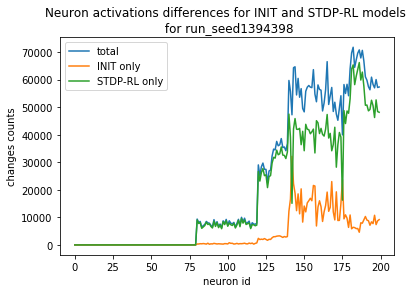

In [26]:
import matplotlib.pyplot as plt

plt.plot(cnts)
plt.plot(cnts_mi_s)
plt.plot(cnts_mi_i)
plt.legend(['total', 'INIT only', 'STDP-RL only'])
plt.xlabel('neuron id')
plt.ylabel('changes counts')
plt.title('Neuron activations differences for INIT and STDP-RL models \n for {}'.format(seed))
plt.show()

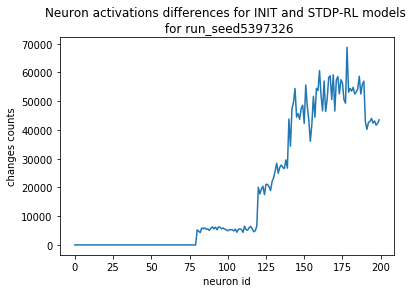

In [21]:
import matplotlib.pyplot as plt

plt.plot(cnts)
plt.xlabel('neuron id')
plt.ylabel('changes counts')
plt.title('Neuron activations differences for INIT and STDP-RL models \n for {}'.format(seed))
plt.show()

In [22]:
import numpy as np

seed1 = 'run_seed1394398'
seed2 = 'run_seed5397326'

# here we call stdp but its not really, its just the other init
path_init = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_INIT/all_activations_{}.json'.format(seed1)
path_stdp = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_INIT/all_activations_{}.json'.format(seed2)
# path_stdp = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_STDP-RL/all_activations_{}.json'.format(seed)

def read_acts(p):
    acts = []
    with open(p) as f:
        for line in f:
            acts.append(json.loads(line))
    return acts

init_acts = read_acts(path_init)
stdp_acts = read_acts(path_stdp)

assert len(init_acts) == len(stdp_acts)

def get_ins(a):
    return sorted(list(set(a)))

diffs = []

for a_i, a_s in tqdm(zip(init_acts, stdp_acts), desc='processing'):
    in1 = get_ins(a_i['es'])
    in2 = get_ins(a_s['es'])
    assert len(in1) == len(in2) and sum([0 if i1 == i2 else 1 for i1, i2 in zip(in1, in2)]) == 0
    r_i = get_ins(a_i['rest'])
    r_s = get_ins(a_s['rest'])
    r_both = get_ins(a_i['rest'] + a_s['rest'])
    
    diffs.append([])
    for r in r_both:
        if r not in r_i or r not in r_s:
            diffs[-1].append(r)
            

cnts = np.zeros(200)

for d in tqdm(diffs, desc='aggregating'):
    for nid in d:
        cnts[nid] += 1


processing: 160000it [00:08, 19275.19it/s]
aggregating: 100%|██████████| 160000/160000 [00:02<00:00, 56466.37it/s]


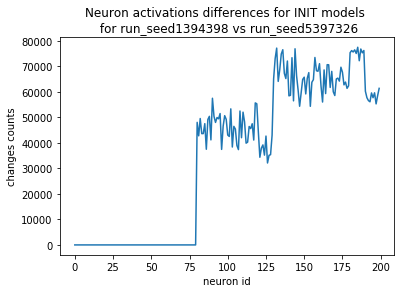

In [23]:
import matplotlib.pyplot as plt

plt.plot(cnts)
plt.xlabel('neuron id')
plt.ylabel('changes counts')
plt.title('Neuron activations differences for INIT models \n for {} vs {}'.format(seed1, seed2))
plt.show()

### Check differences without Gain normalization

In [28]:
import numpy as np

seed = 'run_seed1394398'
# seed = 'run_seed5397326'

path_init = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_INIT/all_activations_{}.json'.format(seed)
path_stdp = '../results/seedrun_m1-2022-01-16/evalmockAllStates_STDP-RL/activations_noNorm_STDP-RL/all_activations_{}.json'.format(seed)

def read_acts(p):
    acts = []
    with open(p) as f:
        for line in f:
            acts.append(json.loads(line))
    return acts

init_acts = read_acts(path_init)
stdp_acts = read_acts(path_stdp)

assert len(init_acts) == len(stdp_acts)

def get_ins(a):
    return sorted(list(set(a)))

diffs = []
mi_s = []
mi_i = []

for a_i, a_s in tqdm(zip(init_acts, stdp_acts), desc='processing'):
    in1 = get_ins(a_i['es'])
    in2 = get_ins(a_s['es'])
    assert len(in1) == len(in2) and sum([0 if i1 == i2 else 1 for i1, i2 in zip(in1, in2)]) == 0
    r_i = get_ins(a_i['rest'])
    r_s = get_ins(a_s['rest'])
    r_both = get_ins(a_i['rest'] + a_s['rest'])
    
    diffs.append([])
    mi_s.append([])
    mi_i.append([])
    for r in r_both:
        if r not in r_i or r not in r_s:
            diffs[-1].append(r)
        if r not in r_i:
            mi_i[-1].append(r)
        if r not in r_s:
            mi_s[-1].append(r)
            

cnts = np.zeros(200)
cnts_mi_s = np.zeros(200)
cnts_mi_i = np.zeros(200)

for d1,d2,d3 in tqdm(zip(diffs, mi_s, mi_i), desc='aggregating'):
    for nid in d1:
        cnts[nid] += 1
    for nid in d2:
        cnts_mi_s[nid] += 1
    for nid in d3:
        cnts_mi_i[nid] += 1


processing: 160000it [00:12, 12521.73it/s]
aggregating: 160000it [00:02, 62299.65it/s]


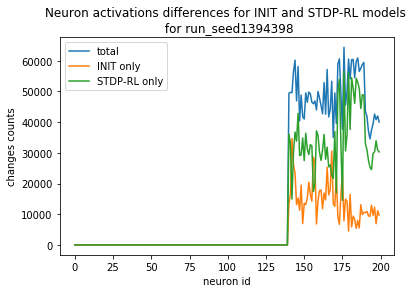

In [29]:
import matplotlib.pyplot as plt

plt.plot(cnts)
plt.plot(cnts_mi_s)
plt.plot(cnts_mi_i)
plt.legend(['total', 'INIT only', 'STDP-RL only'])
plt.xlabel('neuron id')
plt.ylabel('changes counts')
plt.title('Neuron activations differences for INIT and STDP-RL models \n for {}'.format(seed))
plt.show()